Basic Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

connect to drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


read dataset

In [ ]:
ds = pd.read_csv("/content/drive/MyDrive/datasets/Project 1/Salary.csv")

Information of dataset

In [ ]:
ds.head(7)

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150


In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 688.0 bytes


In [ ]:
ds.describe()

,YearsExperience,Salary
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


In [ ]:
ds.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [ ]:
ds.isnull().sum()

,0
YearsExperience,0
Salary,0


this to find color from rgb to hex

In [ ]:
def rgb_to_hex(r, g, b):
    return '#{:02x}{:02x}{:02x}'.format(r, g, b)

hex_color = rgb_to_hex(200, 16, 46) #red
hex_color = rgb_to_hex(1, 33, 105) #blue
print(hex_color)

#012169


In [ ]:
styled_ds = ds.head(7).style.set_properties(**{'background-color': '#c8102e ' ,'color':'black','border-color': '#8b8c8c'})
styled_ds.set_table_styles([
    {"selector": "th", "props": [("color", 'white'), ("background-color", "#012169")]}
])

,YearsExperience,Salary
0,1.100000,39343
1,1.300000,46205
2,1.500000,37731
3,2.000000,43525
4,2.200000,39891
5,2.900000,56642
6,3.000000,60150


In [ ]:
x = ds.iloc[:, :-1].values
y = ds.iloc[:, -1].values

x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5],
       [11.2],
       [11.5],
       [12.3],
       [12.9],
       [13.5]])

In [ ]:
y

array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
        64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
        66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
       109431, 105582, 116969, 112635, 122391, 121872, 127345, 126756,
       128765, 135675, 139465])

Train split 30%

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=30)

draw for xs ys

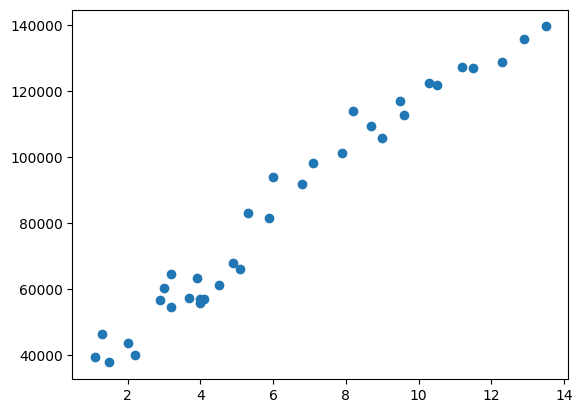

In [ ]:
plt.scatter(x,y)

fitting the model

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

draw line for model

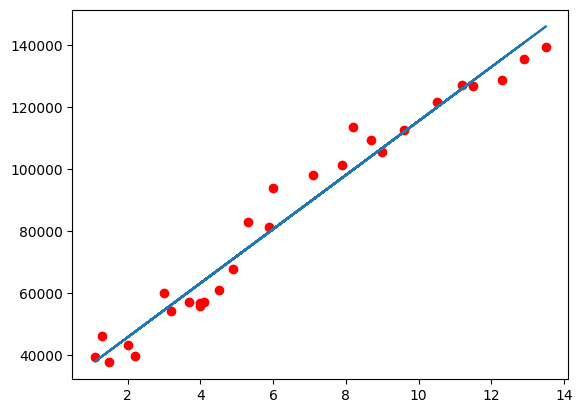

In [ ]:
plt.scatter(x_train, y_train, color='red')
plt.plot(x_train, model.predict(x_train))

In [ ]:
pred = model.predict(x_test)
pred

array([ 72870.143218  ,  53700.44686066, 118180.33460807,  87683.09040321,
        56314.49636393,  62413.9452049 , 111209.53593267])

In [ ]:
y_test

array([ 66029,  56642, 122391,  91738,  64445,  63218, 116969])

to see that is the best value in by draw

<ipython-input-23-abce4fda8c2e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pred-y_test)


<Axes: ylabel='Density'>

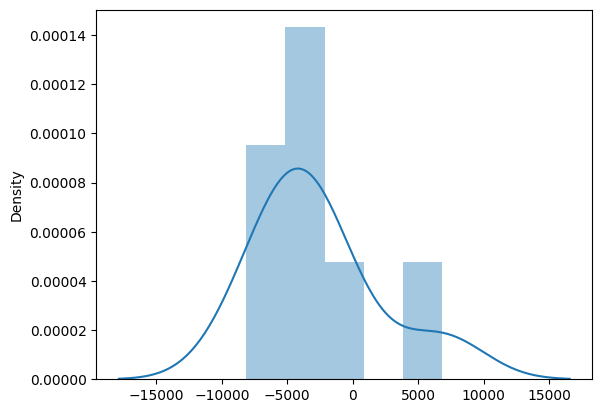

In [ ]:
import seaborn as sns
sns.distplot(pred-y_test)

Present score for model

In [ ]:
r_squared = round(model.score(x, y),3)
print(f'R-squared: {r_squared}')

R-squared: 0.965


Just for copy nothing else

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
mae = mean_absolute_error(y_test, pred)
print(f'MAE: {mae:.3}')

# Mean Squared Error
mse = mean_squared_error(y_test, pred)
print(f'MSE: {mse:.3}')

# Root Mean Squared Error
rmse = np.sqrt(mse)
print(f'RMSE: {rmse:.3}')

MAE: 4.68e+03
MSE: 2.71e+07
RMSE: 5.2e+03


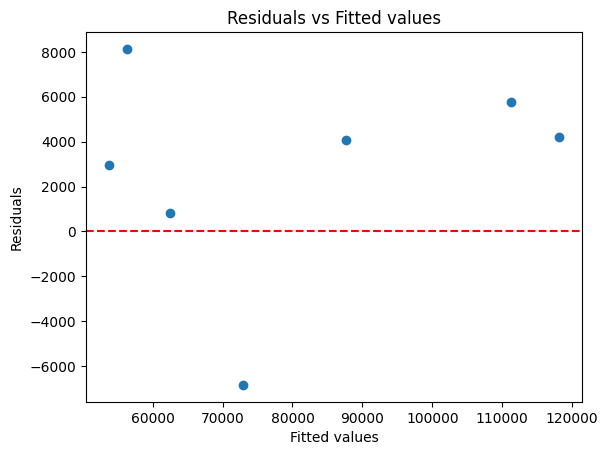

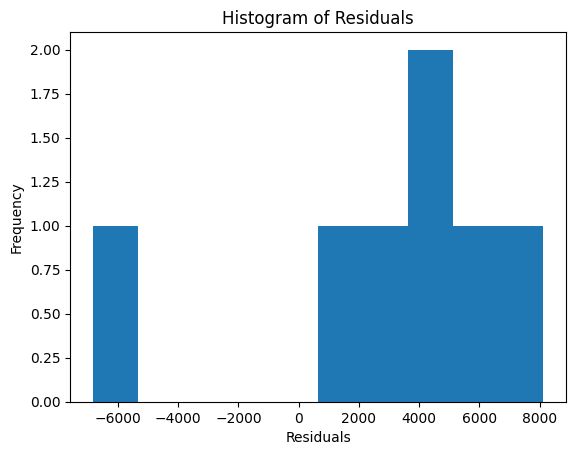

In [ ]:
# Residuals
residuals = y_test - pred

# Residual plot
plt.scatter(pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted values')
plt.show()
print("")
# Histogram of residuals
plt.hist(residuals, bins=10)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
  poly = PolynomialFeatures(degree=4)
  X_poly = poly.fit_transform(x)

In [ ]:
model = LinearRegression()
model.fit(X_poly, y)

LinearRegression()

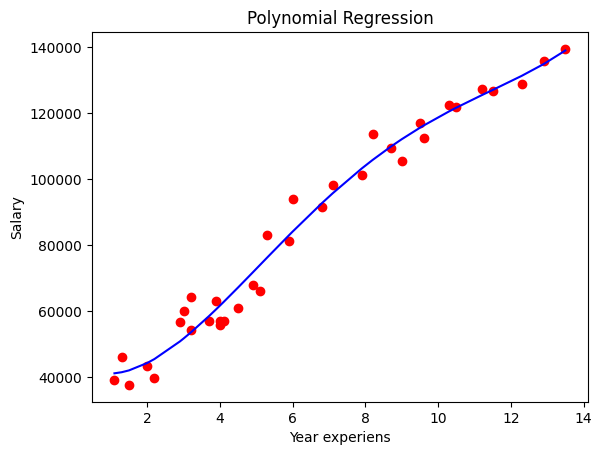

In [ ]:
plt.scatter(x, y, color='red')
plt.plot(x, model.predict(X_poly), color='blue')
plt.title('Polynomial Regression')
plt.xlabel('Year experiens')
plt.ylabel('Salary')
plt.show()

In [ ]:
r_squared = round(model.score(X_poly, y),3)
print(f'R-squared: {r_squared}')

R-squared: 0.977
